# Regressão Linear

### Importar pandas e matplotlib

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

### Criar um Data Frame de faturamento mensal de 12 meses

In [3]:
faturamento = [25,38,29,115, 82,114,120,160,153,190,239,175]

In [4]:
mes = list(range(1,13))

In [5]:
data_dict = {'mês': mes , 'faturamento': faturamento}

In [6]:
data_dict

{'mês': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 'faturamento': [25, 38, 29, 115, 82, 114, 120, 160, 153, 190, 239, 175]}

In [7]:
data = pd.DataFrame.from_dict(data_dict)

In [8]:
data

,mês,faturamento
0,1,25
1,2,38
2,3,29
3,4,115
4,5,82
5,6,114
6,7,120
7,8,160
8,9,153
9,10,190


### Visualizar dados em Gráfico de Dispersão

In [9]:
x = data['mês']
y = data['faturamento']

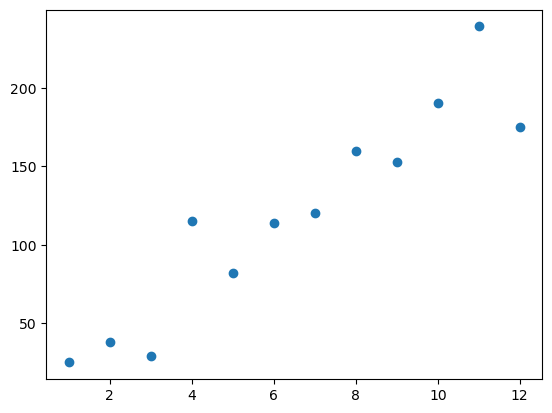

In [10]:
plt.scatter(x,y)

In [11]:
data[['mês', 'faturamento']].corr()

,mês,faturamento
mês,1.000000,0.935045
faturamento,0.935045,1.000000


## Criar Modelo Preditivo aplicando fórmulas (manualmente)

<center><strong>Equação da Regressão Linear</strong></center><br>
Essa é a equação para desenhar uma reta. Mas quando usamos essa equação para criar uma Regressão Linear especificamente, colocamos o acento circunflexo no $\hat{y}$.

$$\hat{y} = mx + b$$

<strong>m</strong> = inclinação da linha<br>
<strong>b</strong> = interceptação do y<br>
<strong>(x,y)</strong> = pontos coordenados<br>

$$m = \frac {n\sum {xy}-\sum x \sum y}{n\sum x^2-(\sum x)^2}$$<br>

$$b = \frac {\sum y-m\sum x}{n}$$

# m

In [12]:
x.sum()

78

In [13]:
y.sum()

1440

In [14]:
x*y

0       25
1       76
2       87
3      460
4      410
5      684
6      840
7     1280
8     1377
9     1900
10    2629
11    2100
dtype: int64

In [15]:
x**2

0       1
1       4
2       9
3      16
4      25
5      36
6      49
7      64
8      81
9     100
10    121
11    144
Name: mês, dtype: int64

In [16]:
(x*y).sum()

11868

In [17]:
(x**2).sum()

650

In [18]:
len(y)

12

In [19]:
(x.sum()**2)

6084

$$m = \frac {n\sum {xy}-\sum x \sum y}{n\sum x^2-(\sum x)^2}$$<br>

In [20]:
m = (len(y)*(x*y).sum()-x.sum()*y.sum())/(len(y)*(x**2).sum()-(x.sum())**2)
m

17.53846153846154

In [21]:
m.round(4)

17.5385

# b

$$b = \frac {\sum y-m\sum x}{n}$$

In [22]:
b = (y.sum() - m *x.sum())/len(y)

In [23]:
b.round(4)

6.0

### Modelo Preditivo
Criar modelo preditivo para prever (ou estimar) o rendimento de qualquer mês

$$\hat{y} = mx + b$$

In [24]:
xpred = 1

In [25]:
ypred = m*xpred + b

In [26]:
ypred

23.538461538461522

### Predições para os 12 meses
Criar uma lista contendo as predições para cada um dos 12 meses

In [30]:
pred_manual = []
for elemento in x:
    ypred = m*elemento+b
    pred_manual.append(ypred)


In [31]:
pred_manual

[23.538461538461522,
 41.07692307692306,
 58.6153846153846,
 76.15384615384615,
 93.6923076923077,
 111.23076923076923,
 128.76923076923075,
 146.3076923076923,
 163.84615384615384,
 181.3846153846154,
 198.9230769230769,
 216.46153846153845]

## Inserir predições no DataFrame

In [32]:
data['predições'] = pred_manual

In [33]:
data

,mês,faturamento,predições
0,1,25,23.538462
1,2,38,41.076923
2,3,29,58.615385
3,4,115,76.153846
4,5,82,93.692308
5,6,114,111.230769
6,7,120,128.769231
7,8,160,146.307692
8,9,153,163.846154
9,10,190,181.384615


### Visualizar Regressão Linear

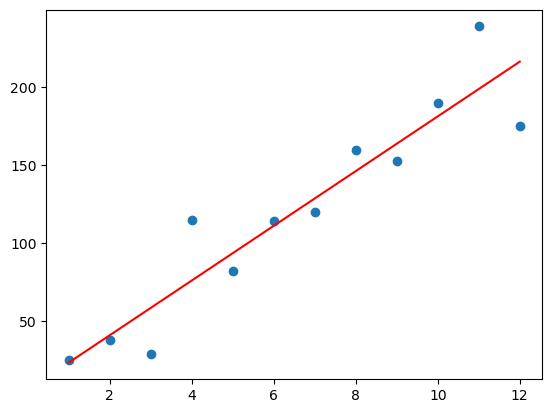

In [34]:
plt.scatter(x,y)
plt.plot(x, data['predições'], color='red')

# Coeficiente de Determinação - R-quadrado ($R²$)

$$R^2 = 1 - \frac {SQ_{res}} {SQ_{tot}} = 1 - \frac {\sum (y_i - \hat{y}_i)^2}{\sum (y_i - \overline y)^2} $$

### Calcular Soma Quadrática dos Resíduos (SQres)

In [37]:
data['predições']

0      23.538462
1      41.076923
2      58.615385
3      76.153846
4      93.692308
5     111.230769
6     128.769231
7     146.307692
8     163.846154
9     181.384615
10    198.923077
11    216.461538
Name: predições, dtype: float64

In [38]:
data['faturamento']

0      25
1      38
2      29
3     115
4      82
5     114
6     120
7     160
8     153
9     190
10    239
11    175
Name: faturamento, dtype: int64

In [35]:
data['resíduos'] = y-pred_manual

In [41]:
SQres = (data['resíduos']**2).sum()

In [42]:
SQres

6323.538461538462

### Calcular Soma Quadrática Total (SQtot)

In [44]:
media = data['faturamento'].mean()
media

120.0

In [45]:
data['faturamento médio'] = media 

In [54]:
SQtot = ((data['faturamento'] - data ['faturamento médio'])**2).sum()

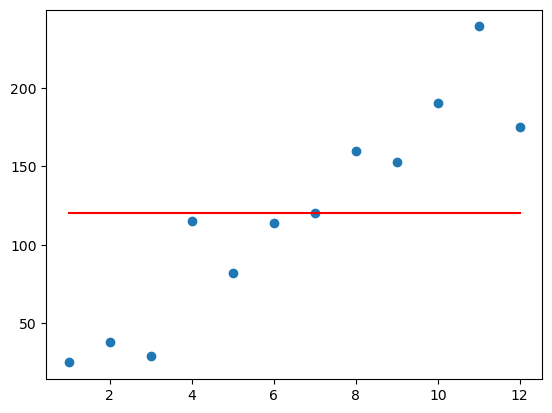

In [52]:
plt.scatter(x,y)
plt.plot(x, data['faturamento médio'], color='red')

### Calcular R-quadrado

In [55]:
SQres/SQtot

0.12569148204210817

In [57]:
r_quadrado = 1-SQres/SQtot
r_quadrado.round(4)

0.8743

# RMSE
Raiz do Erro Quadrático Médio

$ e = y_i - \hat{y_i} $ <br>

$ RMSE = \sqrt {\sum \frac {e^2}{n}}$<br>



In [60]:
(data['resíduos']**2).sum()

6323.538461538462

In [62]:
SQres

6323.538461538462

In [63]:
import numpy as np

In [66]:
rmse = np.sqrt(SQres/len(data))
rmse.round(4)

22.9556

### Importar numpy

# Regra Empírica 68-95-99.7

# Um desvio padrão 68% 

# Dois desvios padrões 95%

# Três desvios padrões 99.7%

# Regressão Linear - Statsmodels

### Importar Statsmodels 

In [27]:
import statsmodels.api as sm

### Definir x e y

### Adicionar constante

### Treinar Modelo

### Gerar predição

### Verificar parâmetros de performance do Modelo Preditivo

### RMSE

In [28]:
from statsmodels.tools.eval_measures import rmse

# Regressão Linear - Sklearn

### Importar sklearn

In [29]:
from sklearn import linear_model

### Instanciar Modelo de Regressão Linear

### Reshape x (remodelar x)
Se X não possuir múltiplas variáveis, sklearn solicita que modifiquemos o formato

### Treinar Modelo

### Gerar predições

### $R^2$

### m

### b

### RMSE

# Todas Predições

### Calculado Manualmente

### Calculado via Statsmodel

### Calculado via Sklearn